<a href="https://colab.research.google.com/github/konjohiwot/Twitter-Sentiment-Analysis-for-US-Airline/blob/main/Twitter_US_Airline_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter US Airline Sentiment
**Background and Context:**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.



**Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").



**Dataset:**

The dataset has the following columns:

tweet_id

airline_sentiment                                               

airline_sentiment_confidence                               

negativereason                                                   

negativereason_confidence   

airline     

airline_sentiment_gold                                              

name     

negativereason_gold

retweet_count

text

tweet_coord

tweet_created

tweet_location

user_timezone




# Downloading and Checking the dataset

In [ ]:
# To import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download ('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize, sent_tokenize

import re, string, unicodedata
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
!pip install contractions
import contractions

from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets (1).csv


In [ ]:
tweets = pd.read_csv("/content/Tweets.csv")

In [ ]:
# To copy the dataset inorder to preserve the original
data = tweets.copy()

In [ ]:
# To check the first ten rows of the data
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [ ]:
# To check the last ten rows of the data
data.tail(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14630,569588473050611712,positive,1.0000,NaN,NaN,American,NaN,Laurelinesblog,NaN,0,@AmericanAir Thanks! He is.,NaN,2015-02-22 12:04:09 -0800,"Chapel Hill, NC",NaN
14631,569588464896876545,negative,1.0000,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,NaN,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada)
14632,569587813856841728,neutral,0.6760,NaN,0.0000,American,NaN,Chad_SMFYM,NaN,0,"“@AmericanAir: @TilleyMonsta George, that does...",NaN,2015-02-22 12:01:31 -0800,NaN,Central Time (US & Canada)
14633,569587705937600512,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [ ]:
data.shape

(14640, 15)

* The dataset has **14640 rows** and **15 columns**

In [ ]:
# TO check for duplictes
data.duplicated().sum()

36

* There are **36 rows** that are duplicated. These rows need to be dropped.

In [ ]:
# To drop the duplicated rows
data= data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

* There are no more duplicates in the data.

In [ ]:
data.shape

(14604, 15)

* After removing the duplicates, the dataset has **14604 rows** and **15 columns**.

In [ ]:
# To check the general info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14604 non-null  int64  
 1   airline_sentiment             14604 non-null  object 
 2   airline_sentiment_confidence  14604 non-null  float64
 3   negativereason                9159 non-null   object 
 4   negativereason_confidence     10503 non-null  float64
 5   airline                       14604 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14604 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14604 non-null  int64  
 10  text                          14604 non-null  object 
 11  tweet_coord                   1015 non-null   object 
 12  tweet_created                 14604 non-null  object 
 13  t

* There are seven columns with missing values in the dataset.
* Majority of the columns are of **object datatype**


In [ ]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5445
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
dtype: int64

* There are **seven** columns with missing values.
* The columns: airline_sentiment_gold, negativereason_gold and tweet_coord have the majority of their values missing. Therefore, this columns should be dropped.

# Exploratory Data Analysis (EDA)

## Plot of the distribution of all tweets among each airline

<Axes: xlabel='airline', ylabel='count'>

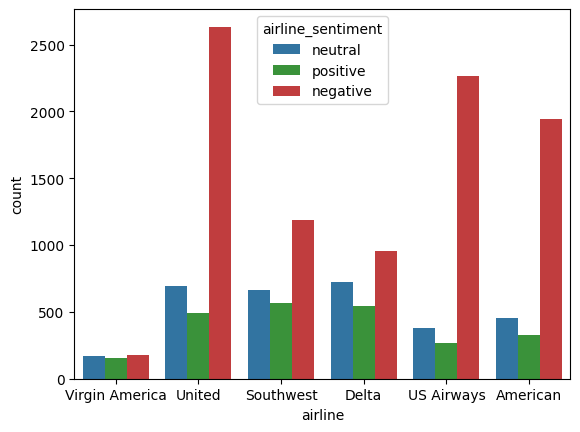

In [ ]:
# To plot the distribution of all tweets
# Colors have been chosen to simplify the viewing. Red for negative, blue for neutral and green for positive
palette = {
    'positive': 'tab:green',
    'neutral': 'tab:blue',
    'negative': 'tab:red',
}
sns.countplot(data, x='airline', hue='airline_sentiment', palette=palette)

* Almost all airlines have more negative tweets than neutral and positive tweets.
* United Airlines has the majority negative tweets than the other airlines. US Airways and American have the second and third highest negative tweets, respectively.
* Southwest and Delta airlines have the highest positive tweets than the other airlines.

## Plot of the distribution of Sentiment across all the tweets

<Axes: xlabel='airline_sentiment', ylabel='count'>

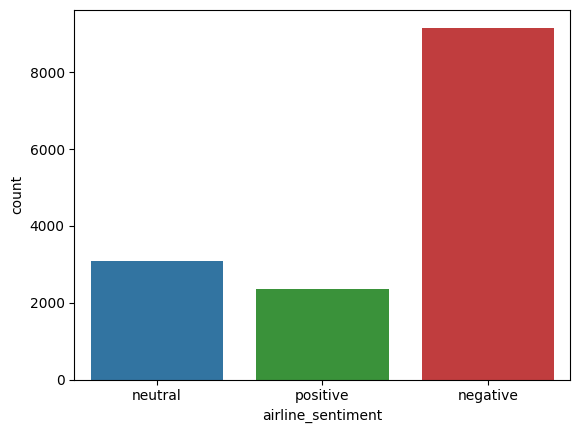

In [ ]:
palette = {
    'positive': 'tab:green',
    'neutral': 'tab:blue',
    'negative': 'tab:red',
}
sns.countplot(data, x='airline_sentiment', palette=palette)

* Majority of the tweets are negative tweets
* Second highest tweets are the neutral tweets

## Plot of the distribution of tweets for each airline

**United Airline**

Text(0.5, 1.0, 'Sentiment Distribution for United Airlines')

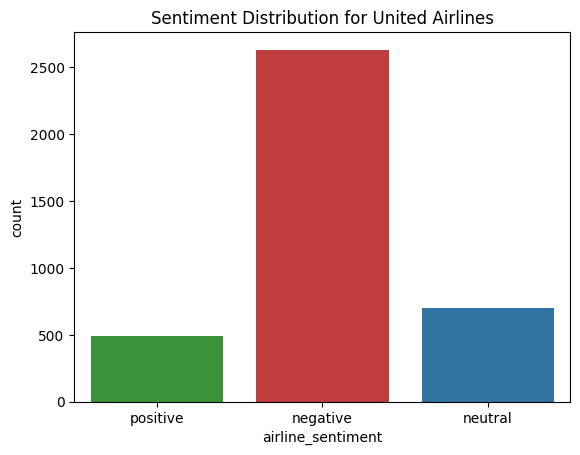

In [ ]:
palette = {
    'positive': 'tab:green',
    'neutral': 'tab:blue',
    'negative': 'tab:red',
}
sns.countplot(data.loc[data['airline']=='United'], x='airline_sentiment', palette=palette)
plt.title("Sentiment Distribution for United Airlines")




**Virgin America**

Text(0.5, 1.0, 'Sentiment Distribution for Virgin America Airlines')

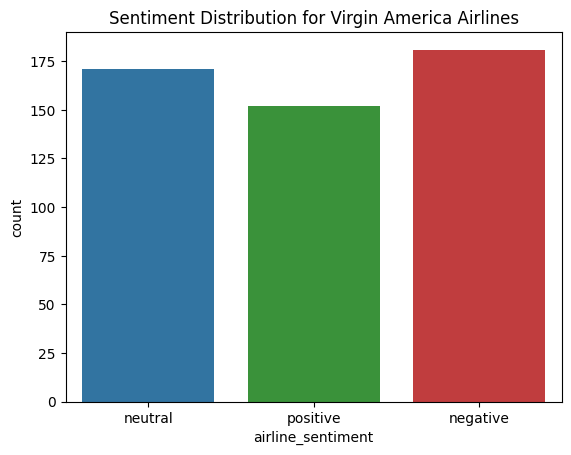

In [ ]:
palette = {
    'positive': 'tab:green',
    'neutral': 'tab:blue',
    'negative': 'tab:red',
}
sns.countplot(data.loc[data['airline']=='Virgin America'], x='airline_sentiment', palette=palette)
plt.title("Sentiment Distribution for Virgin America Airlines")

* Virgin America has balanced number of sentiments from the three groups, eventhough the highest number is that of the negative tweets.

## Delta

Text(0.5, 1.0, 'Sentiment Distribution for Delta Airlines')

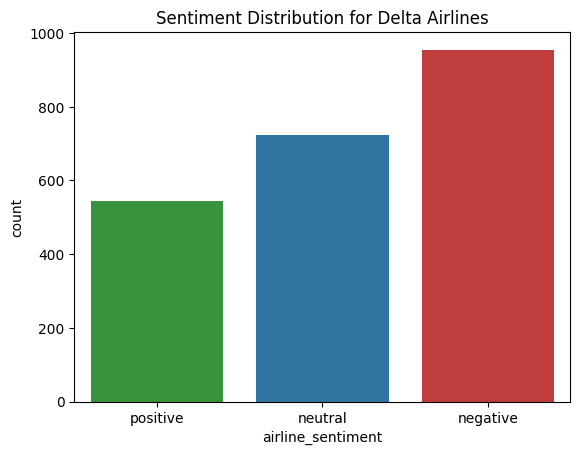

In [ ]:
palette = {
    'positive': 'tab:green',
    'neutral': 'tab:blue',
    'negative': 'tab:red',
}
sns.countplot(data.loc[data['airline']=='Delta'], x='airline_sentiment', palette=palette)
plt.title("Sentiment Distribution for Delta Airlines")

* The majority of the tweets are negative tweets.
* The second highest is the neutral tweets.

## SouthWest

Text(0.5, 1.0, 'Sentiment Distribution for Southwest Airlines')

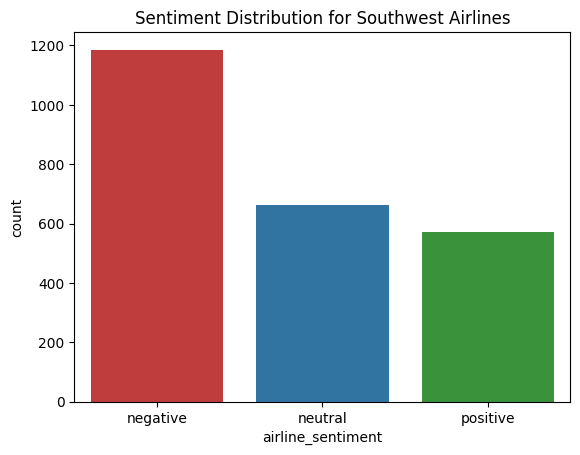

In [ ]:
palette = {
    'positive': 'tab:green',
    'neutral': 'tab:blue',
    'negative': 'tab:red',
}
sns.countplot(data.loc[data['airline']=='Southwest'], x='airline_sentiment', palette=palette)
plt.title("Sentiment Distribution for Southwest Airlines")

* The majority of the tweets for Southwest are the negative tweets.
* The neutral and positive tweets are balanced.

**US Airways**

Text(0.5, 1.0, 'Sentiment Distribution for US Airways Airlines')

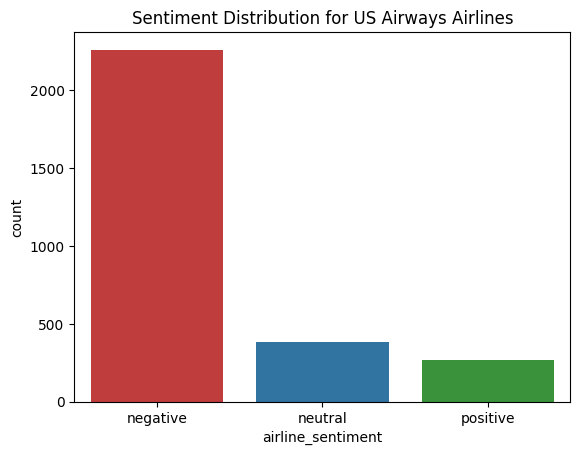

In [ ]:
palette = {
    'positive': 'tab:green',
    'neutral': 'tab:blue',
    'negative': 'tab:red',
}
sns.countplot(data.loc[data['airline']=='US Airways'], x='airline_sentiment', palette=palette)
plt.title("Sentiment Distribution for US Airways Airlines")

* The majority of the tweets for US Airways are negative tweets.
* The negative tweets are very large in proportion compared to both the neutral and positive tweets.
* The distribution of the sentiment of the tweets are highly imbalanced.

**American Airlines**

Text(0.5, 1.0, 'Sentiment Distribution for American Airlines')

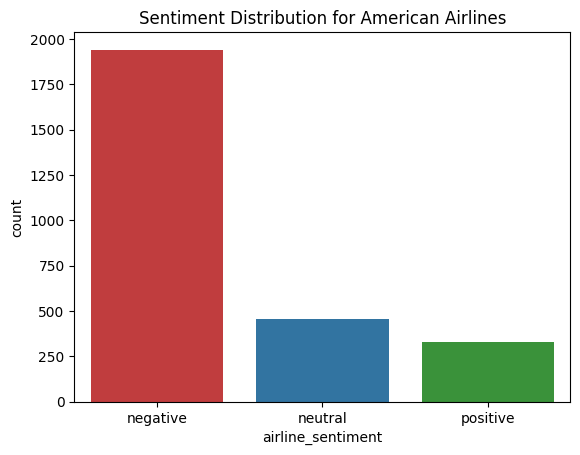

In [ ]:
palette = {
    'positive': 'tab:green',
    'neutral': 'tab:blue',
    'negative': 'tab:red',
}
sns.countplot(data.loc[data['airline']=='American'], x='airline_sentiment', palette=palette)
plt.title("Sentiment Distribution for American Airlines")

* The majority of the tweets of American Airlines are negative.
* The distribution of the sentiment of the tweets are hightly imbalanced.

## Plot of the distribution of all the negative reasons

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bad Flight'),
  Text(1, 0, "Can't Tell"),
  Text(2, 0, 'Late Flight'),
  Text(3, 0, 'Customer Service Issue'),
  Text(4, 0, 'Flight Booking Problems'),
  Text(5, 0, 'Lost Luggage'),
  Text(6, 0, 'Flight Attendant Complaints'),
  Text(7, 0, 'Cancelled Flight'),
  Text(8, 0, 'Damaged Luggage'),
  Text(9, 0, 'longlines')])

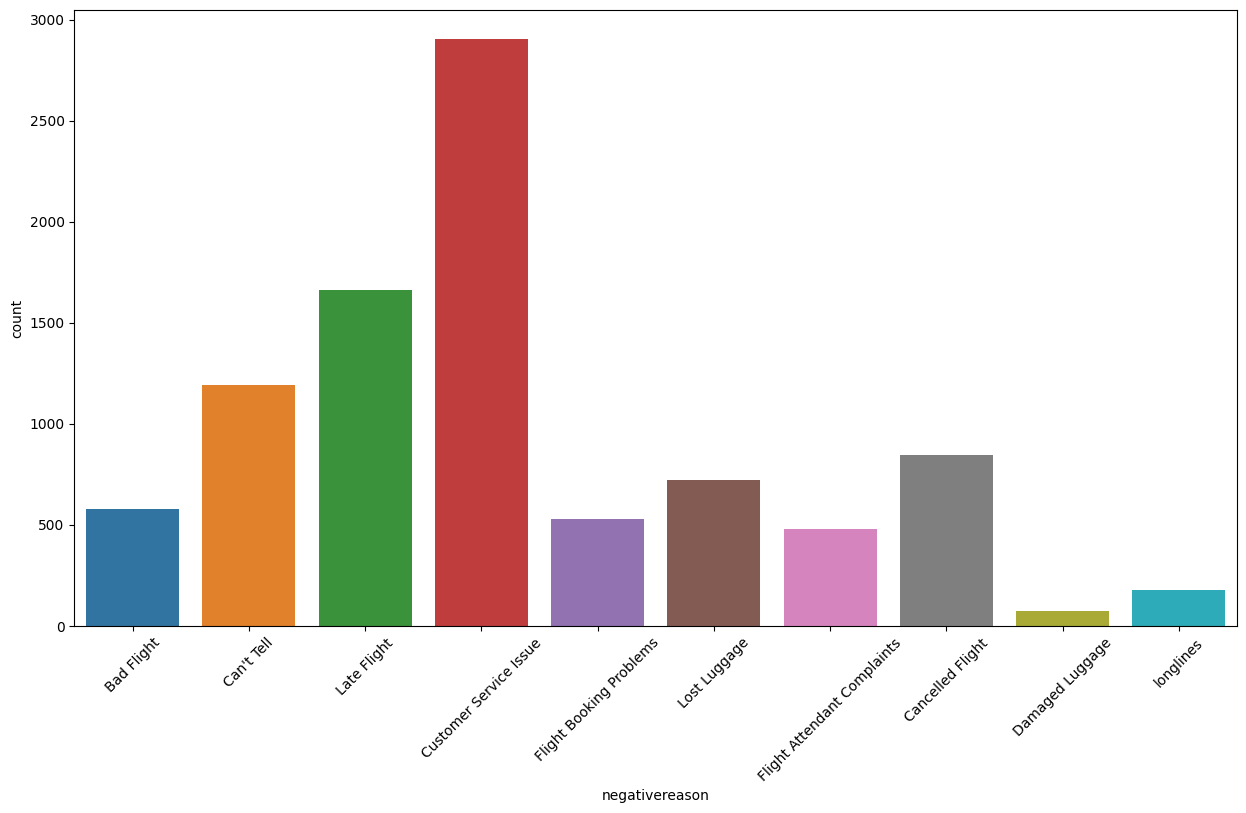

In [ ]:
 plt.figure(figsize=(15,8))
 sns.countplot(data, x='negativereason')
 plt.xticks(rotation=45)

* The three top negative reasons are:
 **Customer service issue,
Late Flight,
Can't tell**
* **Cancelled flight, lost luggage and bad flight** are also another significant negative reasons,

## Word Clouds

**Word Cloud for the negative tweets**

In [ ]:
negative_tweets=data[data['airline_sentiment']=='negative']
words = ' '.join(negative_tweets['text'])
cleaned_word = " ".join([word for word in words.split()])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

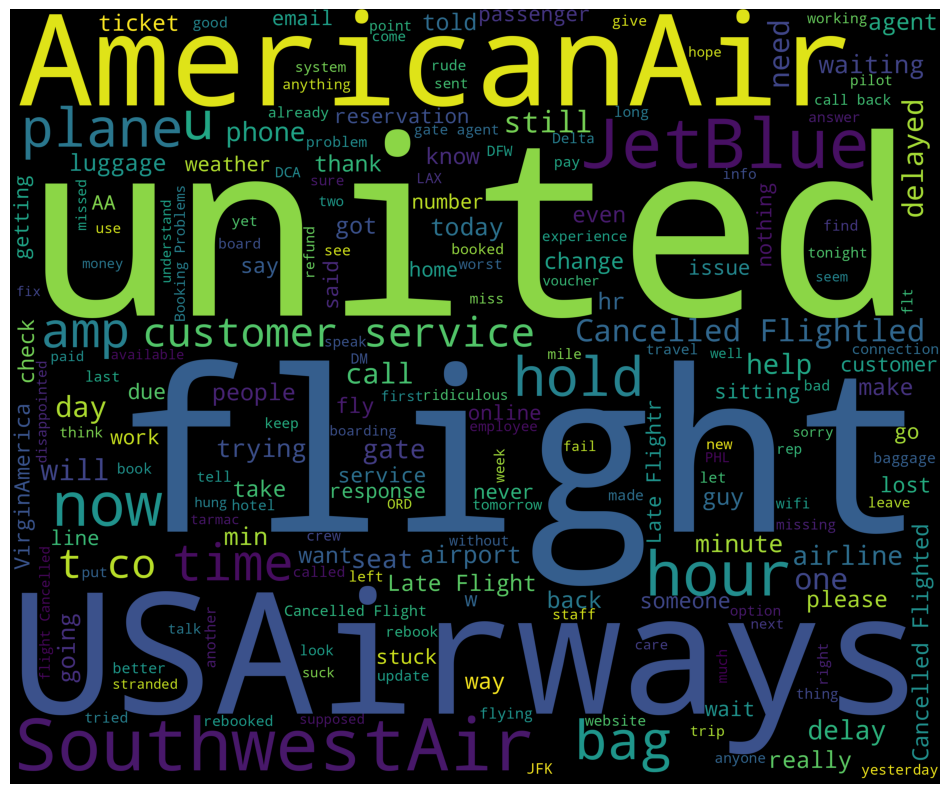

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* The bold words in the word clouds are the airline names that appear after the @ in the tweets.
* **Cancelled flight, lost, missed connection, wait, rebooked, disappointed, stranded** were some of the recurring words observed in the negative reviews.

**Word Cloud for positive tweets**

In [ ]:
positive_tweets = data[data['airline_sentiment']=='positive']
words = ' '.join(positive_tweets['text'])
cleaned_words = ' '.join([word for word in words.split()])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

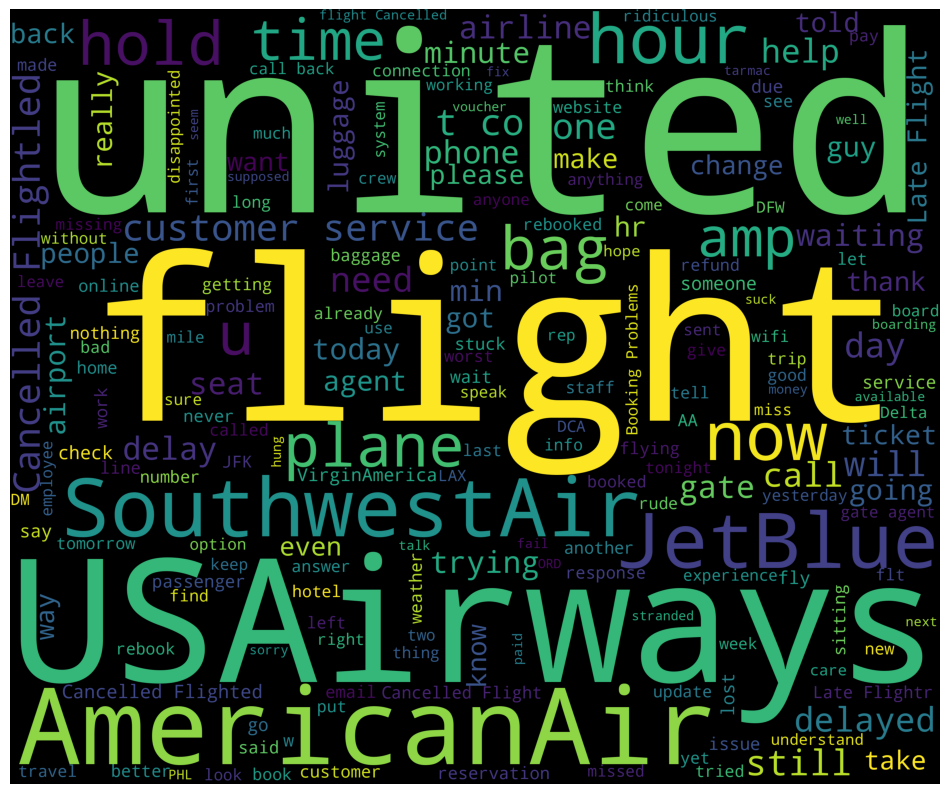

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* The bold words in the word clouds are the airline names that appear after the @ in the tweets.
* **Hold, customer service, bag, time, cancelled flight** are some of the words observed on the word cloud.

## Dropping irrelevant columns

In [ ]:
# To drop unnecessary columns
df = data.drop(['tweet_id','negativereason_confidence','airline_sentiment_gold','negativereason_gold','retweet_count','name','tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14604 non-null  object 
 1   airline_sentiment_confidence  14604 non-null  float64
 2   negativereason                9159 non-null   object 
 3   airline                       14604 non-null  object 
 4   text                          14604 non-null  object 
dtypes: float64(1), object(4)
memory usage: 684.6+ KB


In [ ]:
df = df.drop(["negativereason"], axis=1)

In [ ]:
df.shape

(14604, 4)

* Now our data has **14604 rows** and **4 columns**

# Data Pre-processing

## Html tag removal.

In [ ]:
def remove_html(text):
  soup = BeautifulSoup(text,'html.parser')
  return soup.get_text()

In [ ]:
df['text'] = df['text'].apply(lambda x: remove_html(x))

<ipython-input-113-a4da052c1fca>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text,'html.parser')


In [ ]:
df.head()

,airline_sentiment,airline_sentiment_confidence,airline,text
0,neutral,1.0000,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,0.3486,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...


In [ ]:
df['text'].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

## Remove the numbers.

In [ ]:
def remove_numbers(text):
  text = re.sub(r"\b\d+\b", '', text)
  return text

In [ ]:
df['text'] = df['text'].apply(lambda x: remove_numbers(x))

In [ ]:
df['text'].tail(10)

14630                          @AmericanAir Thanks! He is.
14631    @AmericanAir thx for nothing on getting us out...
14632    “@AmericanAir: @TilleyMonsta George, that does...
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over  minutes Late Flight...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have  ppl so we need  know how...
Name: text, dtype: object

## Expanding Contractions

In [ ]:
def replace_contractions(text):
  return contractions.fix(text)

In [ ]:
df['text'] = df['text'].apply(lambda x: replace_contractions(x))

## Tokenization

In [ ]:
df['text'] = df['text'].apply(lambda x: word_tokenize(x))

In [ ]:
df['text'].tail()

14635    [@, AmericanAir, thank, you, we, got, on, a, d...
14636    [@, AmericanAir, leaving, over, minutes, Late,...
14637    [@, AmericanAir, Please, bring, American, Airl...
14638    [@, AmericanAir, you, have, my, money, ,, you,...
14639    [@, AmericanAir, we, have, people, so, we, nee...
Name: text, dtype: object

## Removal of Special Characters and Punctuations.

In [ ]:
def remove_special_char(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
df['text']=df['text'].apply(lambda x: remove_special_char(x))

In [ ]:
df['text'].tail()

14635    [@, AmericanAir, thank, you, we, got, on, a, d...
14636    [@, AmericanAir, leaving, over, minutes, Late,...
14637    [@, AmericanAir, Please, bring, American, Airl...
14638    [@, AmericanAir, you, have, my, money, ,, you,...
14639    [@, AmericanAir, we, have, people, so, we, nee...
Name: text, dtype: object

In [ ]:
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [ ]:
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))

## Conversion to lowercase.

In [ ]:
def make_lowercase(words):
  new_words = []
  for word in words:
    new_word = word.lower()
    new_words.append(new_word)
  return new_words


In [ ]:
df['text'] = df['text'].apply(lambda x: make_lowercase(x))

## Removal of stopwords

In [ ]:
new_stopwords = ['virginamerica', "usairways", 'americanair', 'united','southwestair', 'jetblue',] #to remove the names of the airlines after the '@' symbol in the tweets.
stop_list = nltk.corpus.stopwords.words('english')
stop_list.extend(new_stopwords)
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_list:
            new_words.append(word)
    return new_words


In [ ]:
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

In [ ]:
df['text'].head(10)

0                                     [dhepburn, said]
1        [plus, added, commercials, experience, tacky]
2       [today, must, mean, need, take, another, trip]
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
5    [seriously, would, pay, flight, seats, playing...
6    [yes, nearly, every, time, fly, vx, ear, worm,...
7    [really, missed, prime, opportunity, men, with...
8                                       [well, notbut]
9                [amazing, arrived, hour, early, good]
Name: text, dtype: object

## Lemmatize or stemming.

In [ ]:
lemma = WordNetLemmatizer()
def lemmatizer(words):
  new_words = []
  for word in words:
    new_word = lemma.lemmatize(word, pos='v')
    new_words.append(new_word)
  return new_words


In [ ]:
df['text'] = df['text'].apply(lambda x: lemmatizer(x))

In [ ]:
df.head(10)

,airline_sentiment,airline_sentiment_confidence,airline,text
0,neutral,1.0000,Virgin America,"[dhepburn, say]"
1,positive,0.3486,Virgin America,"[plus, add, commercials, experience, tacky]"
2,neutral,0.6837,Virgin America,"[today, must, mean, need, take, another, trip]"
3,negative,1.0000,Virgin America,"[really, aggressive, blast, obnoxious, enterta..."
4,negative,1.0000,Virgin America,"[really, big, bad, thing]"
5,negative,1.0000,Virgin America,"[seriously, would, pay, flight, seat, play, re..."
6,positive,0.6745,Virgin America,"[yes, nearly, every, time, fly, vx, ear, worm,..."
7,neutral,0.6340,Virgin America,"[really, miss, prime, opportunity, men, withou..."
8,positive,0.6559,Virgin America,"[well, notbut]"
9,positive,1.0000,Virgin America,"[amaze, arrive, hour, early, good]"


## Join the words in the list to convert them back to text string in the data frame.

In [ ]:
def joined(words):
  return ' '.join(words)

In [ ]:
df['text'] = df['text'].apply(lambda x: joined(x))

##Print the first 5 rows of data after pre-processing.

In [ ]:
df['text'].head()

0                                         dhepburn say
1                plus add commercials experience tacky
2               today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

# Text Vectorization

##CountVectorizer.

In [ ]:
count_vec = CountVectorizer(max_features = 500)
df_features = count_vec.fit_transform(df['text'])
df_features = df_features.toarray()

In [ ]:
df_features.shape

(14604, 500)

In [ ]:
X = df_features
Y = df['airline_sentiment']

In [ ]:
Y.value_counts(normalize = True)

negative    0.627157
neutral     0.211654
positive    0.161189
Name: airline_sentiment, dtype: float64

* The dataset is imbalanced.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [ ]:
base_learner = np.arange(100,500,100).tolist()
base_learner

[100, 200, 300, 400]

In [ ]:
cv_scores = []
for b in base_learner:
  rf = RandomForestClassifier(n_estimators=b)
  scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
  cv_scores.append(scores.mean())

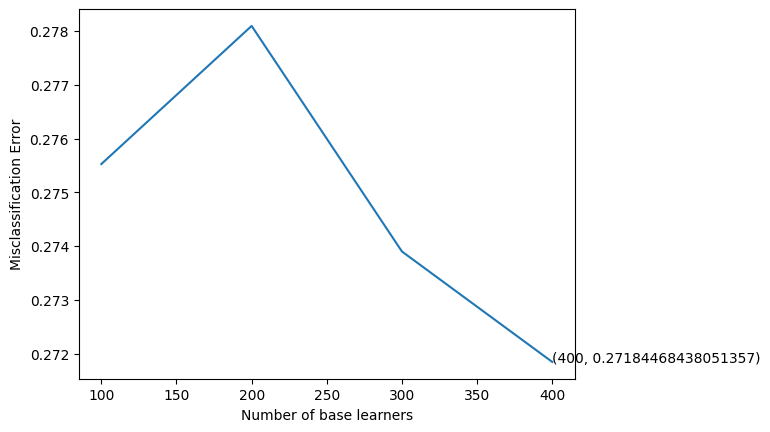

(400, 0.27184468438051357)


In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]
optimal_learners = base_learner[error.index(min(error))]
plt.plot(base_learner, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()
print(xy)

In [ ]:
rf = RandomForestClassifier(n_estimators = optimal_learners)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.85      0.86      2088
     neutral       0.46      0.48      0.47       476
    positive       0.61      0.62      0.62       357

    accuracy                           0.76      2921
   macro avg       0.65      0.65      0.65      2921
weighted avg       0.77      0.76      0.77      2921



[[1785  219   84]
 [ 194  227   55]
 [  89   47  221]]


<Axes: >

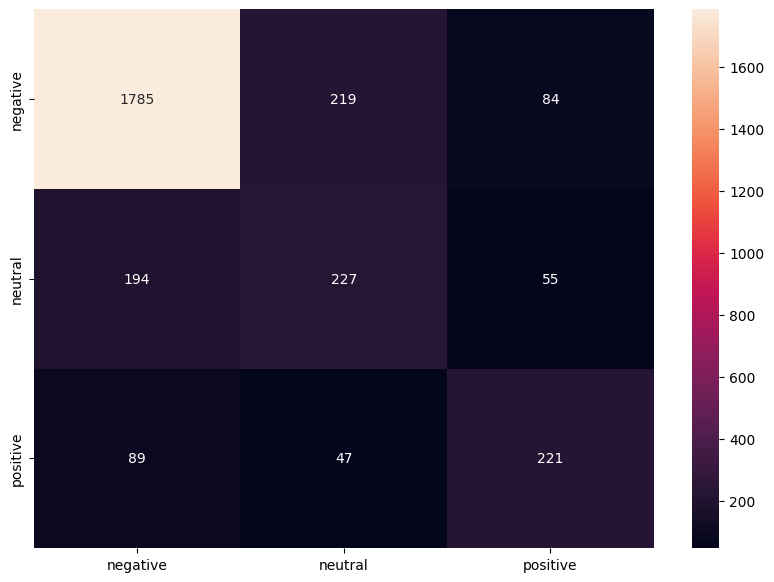

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thank,delay,great,http,flight,love,get,hold,hours,awesome,bag,cancel,would,fly,hour,best,wait,please,go,help,amaze,time,make,call,service,plane,still,customer,need,worst,like,good,never,us,miss,say,know,one,try,airline,
 
 


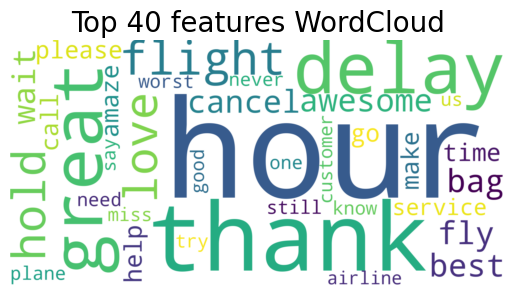

In [ ]:
all_features = count_vec.get_feature_names_out()
#vocabulary_.keys()           #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=rf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

##Tf-idf Vectorizer.

In [ ]:
tfidf_vec = TfidfVectorizer()
df_features = tfidf_vec.fit_transform(df['text'])
df_features = df_features.toarray()

In [ ]:
df_features.shape

(14604, 12745)

In [ ]:
X = df_features
Y = data['airline_sentiment']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

**Note** The cross validation for the TF-IDF took considerably very long time of over 45 minutes, and still didn't execute after waiting for that amount of time. Therefore, the optimal learning score from the previous cross validation run is used as the number of estimator for the TF-IDF model.

In [ ]:
# Training the best model and calculating accuracy on test data .
optimal_learners = 400
rf = RandomForestClassifier(n_estimators=optimal_learners)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.94      0.89      2088
     neutral       0.62      0.41      0.49       476
    positive       0.74      0.57      0.64       357

    accuracy                           0.81      2921
   macro avg       0.73      0.64      0.67      2921
weighted avg       0.79      0.81      0.79      2921



[[1960   89   39]
 [ 249  193   34]
 [ 127   27  203]]


<Axes: >

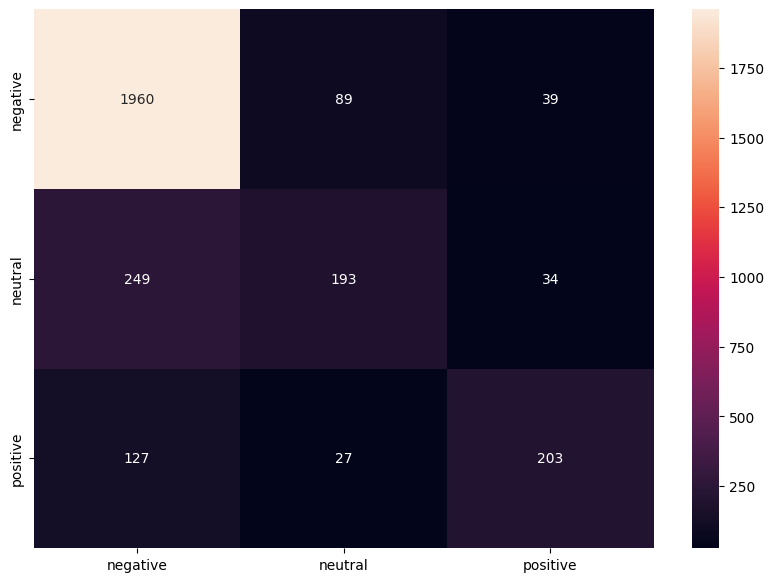

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thank,flight,delay,great,http,love,hold,get,hours,bag,awesome,cancel,best,time,hour,service,wait,fly,dm,plane,follow,please,call,make,good,send,customer,still,help,amaze,much,fleek,never,appreciate,fleet,go,would,lose,need,worst,
 
 


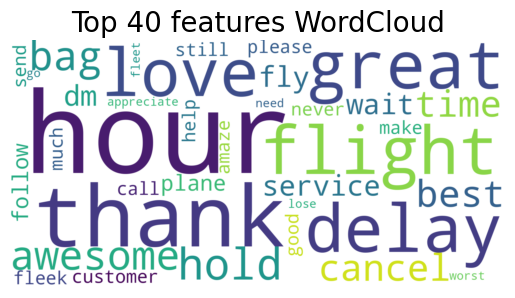

In [ ]:
all_features = tfidf_vec.get_feature_names_out()
#vocabulary_.keys()           #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=rf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print(top_features)

print(" ")
print(" ")

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000,
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

# Summary
* Exploratory data analysis was performed on the dataset.
* The majority of the tweets were negative tweets. Hence, the dataset was imbalanced.
* Most airlines have negative tweets that are considerably higher than the neutral and positive tweets, while some airlines have about equal proportion of the negative, neutral and positive tweets.
* Feature extraction was performed. Html tags were removed, stop words, which also included the airline names in the tweets were removed, punctuation, numbers and special characters were removed, the words were changed to lower case and lemmatized.
* Count Vectorizer and TF-IDF text encodings were used.
* Machine learning model, Rain Forest Classifier was used.
* **Count Vectorizer** gave an accuracy of 0.76. The precision, recall and f1-scores of neutral were lower than that of the positive and negative. Hence, the model had difficulty classifying the neutral sentiments. The precision, recall and f1-scores of the negative were the highest. The model was effiecient in classifying the negative sentiments.
* **hour, thank, great, hold, love, wait** were some of the top 40 feature words generated by the word cloud.
* **Tf-Idf Vectorizer** gave slightly higher performance meterics, with an accuracy of 0.81.
* Precision, Recall and F1-scores of the Tf-idf Vectorizer were slightly higher than that of Count Vectorizer.
* The precision, recall and f1-scores of neutral were lower than that of the positive and negative. Hence, the model had difficulty classifying the neutral sentiments. The precision, recall and f1-scores of the negative were the highest. The model was effiecient in classifying the negative sentiments.
* **hour, thank, delay, flight, great, love** were some of the top 40 feature words generated by the word cloud.
* Count Vectorizer and Tf-Idf Vectorizer gave similar metrics scores, eventhough Tf-Idf has slightly higher metrics scores. They also produced similar word clouds of the top 40 feature words.